In [1]:

import torch_geometric.loader as loader

import networkx as nx
from pathlib import Path
from torch_geometric.datasets import ZINC
from torch_geometric.utils import to_networkx

from src.datasets import AddNodeDegree


def get_zinc_ds_with_degree():
    root = Path.cwd()
    project_dir = root.resolve().parent
    datasets = project_dir / "datasets"
    return ZINC(root=datasets / 'test' / 'zinc_subset_with_degree', transform=AddNodeDegree(), force_reload=False)

In [2]:
dataset = get_zinc_ds_with_degree()

dataset.print_summary()
print(f"{dataset.num_classes=}")
print(f"{dataset.num_node_features=}")
print(f"{dataset.num_features=}")
print(f"{dataset.num_edge_features=}")

print(len(dataset))
print(dataset[0])
d = dataset[1]
d2 = dataset[2]
print(d2.x)


100%|██████████| 220011/220011 [00:13<00:00, 15786.41it/s]


ZINC (#graphs=220011):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |     23.2 |     49.8 |
| std        |      4.5 |     10.6 |
| min        |      6   |     10   |
| quantile25 |     20   |     42   |
| median     |     23   |     50   |
| quantile75 |     26   |     56   |
| max        |     38   |     88   |
+------------+----------+----------+


/Users/arvandkaveh/Projects/kit/graph_hdc/.venv/lib/python3.13/site-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


dataset.num_classes=218362
dataset.num_node_features=2
dataset.num_features=2
dataset.num_edge_features=1
220011
Data(x=[33, 2], edge_index=[2, 72], edge_attr=[72], y=[1])
tensor([[0., 1.],
        [0., 2.],
        [0., 2.],
        [2., 3.],
        [0., 3.],
        [5., 2.],
        [4., 3.],
        [0., 1.],
        [0., 3.],
        [2., 2.],
        [0., 3.],
        [0., 3.],
        [0., 3.],
        [1., 1.],
        [2., 2.],
        [0., 3.],
        [0., 1.],
        [0., 3.],
        [0., 1.],
        [5., 2.],
        [2., 2.],
        [2., 2.],
        [0., 3.],
        [0., 3.],
        [0., 2.],
        [0., 2.]])


In [3]:
d2.edge_index.T.tolist()

[[0, 1],
 [1, 0],
 [1, 2],
 [2, 1],
 [2, 3],
 [3, 2],
 [3, 4],
 [3, 22],
 [4, 3],
 [4, 5],
 [4, 20],
 [5, 4],
 [5, 6],
 [6, 5],
 [6, 7],
 [6, 8],
 [7, 6],
 [8, 6],
 [8, 9],
 [8, 14],
 [9, 8],
 [9, 10],
 [10, 9],
 [10, 11],
 [10, 19],
 [11, 10],
 [11, 12],
 [11, 15],
 [12, 11],
 [12, 13],
 [12, 14],
 [13, 12],
 [14, 8],
 [14, 12],
 [15, 11],
 [15, 16],
 [15, 17],
 [16, 15],
 [17, 15],
 [17, 18],
 [17, 19],
 [18, 17],
 [19, 10],
 [19, 17],
 [20, 4],
 [20, 21],
 [21, 20],
 [21, 22],
 [22, 3],
 [22, 21],
 [22, 23],
 [23, 22],
 [23, 24],
 [23, 25],
 [24, 23],
 [24, 25],
 [25, 23],
 [25, 24]]

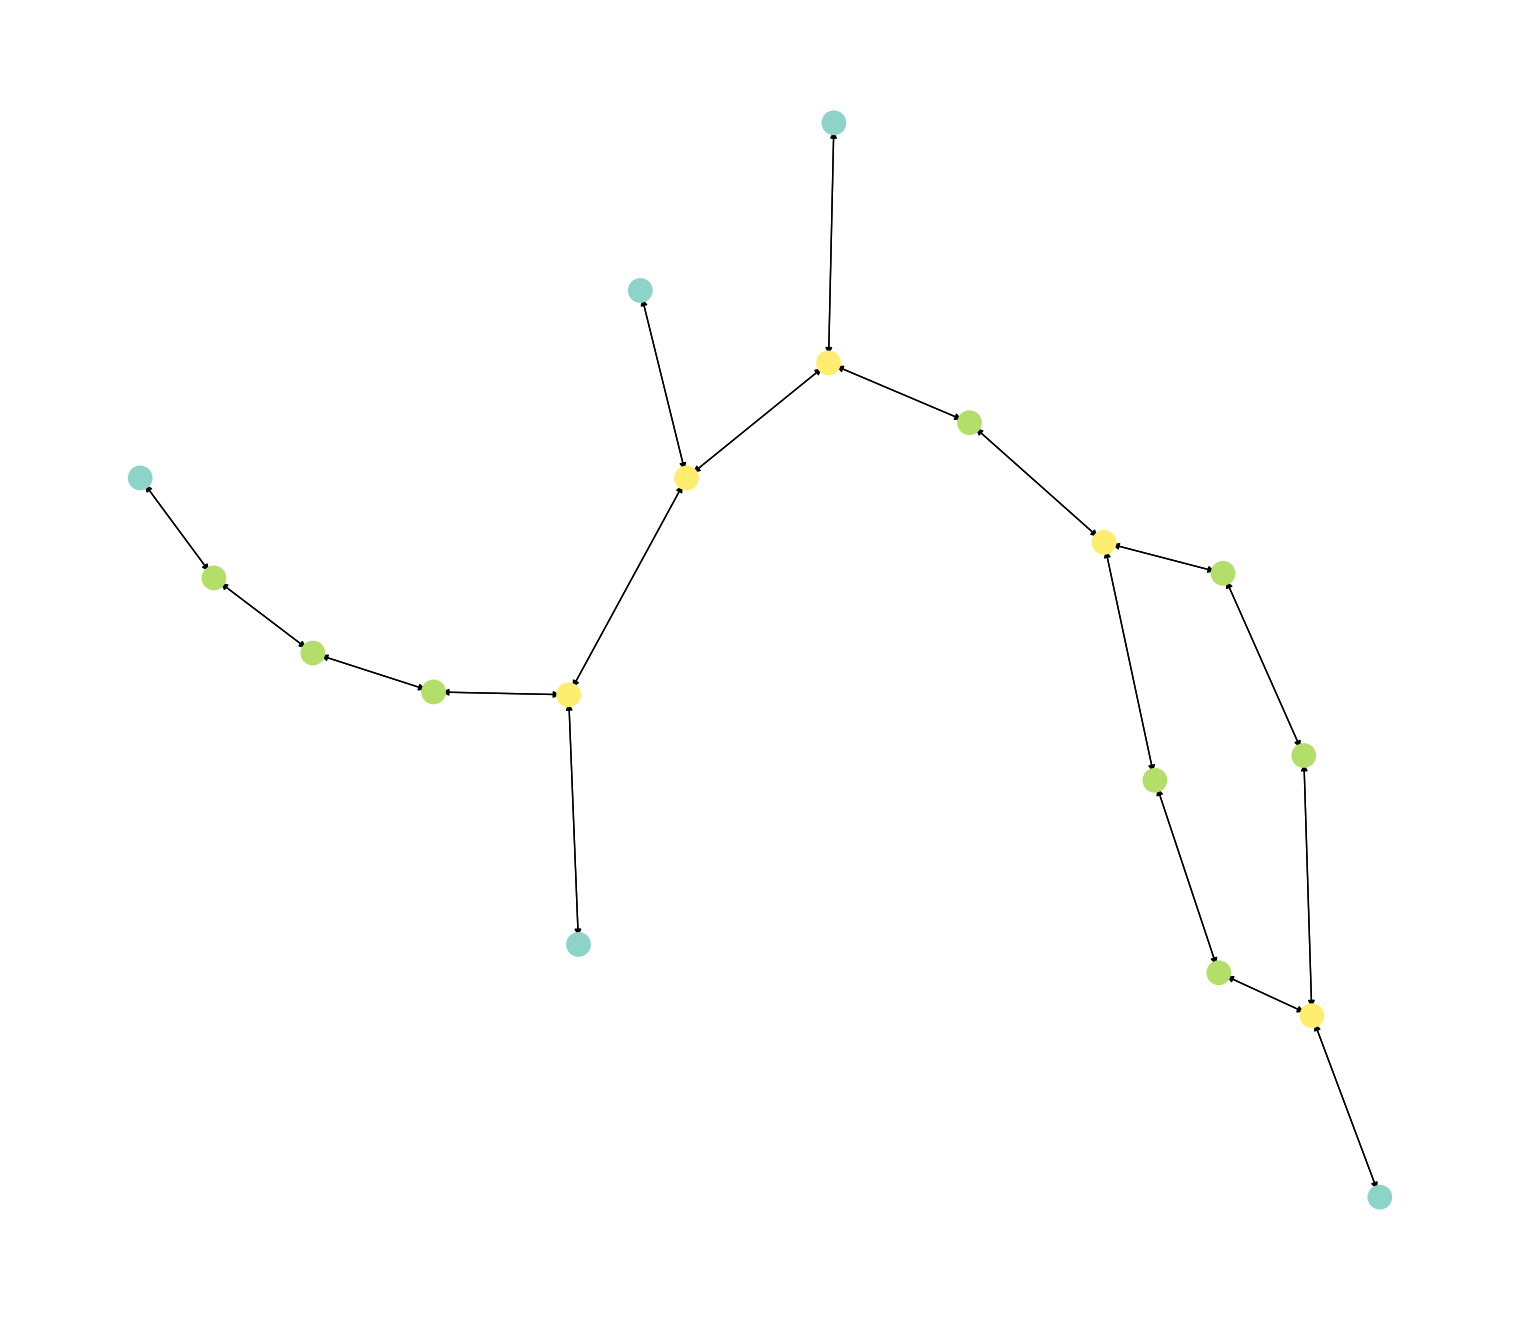

In [4]:
vis = to_networkx(d)

node_labels = d.x[:, -1].numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13))
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=140,linewidths=6)
plt.show()

In [5]:
from rdkit import Chem
from torch_geometric.datasets import ZINC

# 1) Gather all unique atomic numbers over the entire dataset
unique_atomic_nums = set()
for data in ZINC(root="datasets/ZINC_full_2", subset=False):  # full ZINC
    rdkit_mol = Chem.MolFromSmiles(data.smiles)  # data.smiles is available *before* processing
    for atom in rdkit_mol.GetAtoms():
        unique_atomic_nums.add(atom.GetAtomicNum())
# Now unique_atomic_nums has exactly 28 integers.

# 2) Sort them and assign 0..27
sorted_atoms = sorted(unique_atomic_nums)
# Example result (length 28):
# [1, 3, 4, 5, 6, 7, 8, 9,
#  11,12,13,14,15,16,17,
#  19,20,22,23,24,25,26,27,28,29,30,34,35,53]
atom_to_idx = { atom: idx for idx, atom in enumerate(sorted_atoms) }
idx_to_atom = { idx: atom for atom, idx in atom_to_idx.items() }

AttributeError: 'GlobalStorage' object has no attribute 'smiles'

In [6]:

node_codes = set()
node_degrees = set()
bond_codes = set()

max_nodes = 0
max_edges = 0
for data in dataset:
    # data.x is shape [num_nodes,1], so squeeze to get a 1D list of ints
    node_codes |= set(data.x.T[0].tolist())
    node_degrees |= set(data.x.T[1].tolist())
    # data.edge_attr is already a 1D LongTensor of bond‐order ints
    bond_codes |= set(data.edge_attr.tolist())
    max_nodes = max(max_nodes, data.x.shape[0])
    max_edges = max(max_edges, data.edge_attr.shape[0])

print("Unique atom‐type codes:", sorted(node_codes))
print("Number of distinct atom‐types:", len(node_codes))
print("Unique Node Degrees:", sorted(node_degrees))
print("Number of distinct Node Degrees:", len(node_degrees))
print("Unique bond‐type codes:", sorted(bond_codes))
print("Number of distinct bond‐types:", len(bond_codes))
print("Max nodes:", max_nodes)
print("Max edges:", max_edges)

Unique atom‐type codes: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0]
Number of distinct atom‐types: 28
Unique Node Degrees: [1.0, 2.0, 3.0, 4.0, 5.0]
Number of distinct Node Degrees: 5
Unique bond‐type codes: [1, 2, 3]
Number of distinct bond‐types: 3
Max nodes: 38
Max edges: 88


In [ ]:
loader = loader.DataLoader(dataset, batch_size=16)
batch = next(iter(loader))
batch

In [ ]:
vis_batch = to_networkx(batch)

node_labels = batch.x.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13))
nx.draw(vis_batch, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=140,linewidths=6)
plt.show()